* muons from muon stream
* photons from photon stream
* Particle Flows from zerobias stream
* calo particles from zerobias stream

In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mydir = '/home/fedor/notebook/ml4dc/ok_files'
paths = []
for dirpath, dirnames, filenames in os.walk(mydir):
    if not dirnames:
        paths.append(dirpath)
        print dirpath, "has 0 subdirectories and", len(filenames), "files"

/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016G-18Apr2017-v1/170808_215231/0000 has 0 subdirectories and 3 files
/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016G-18Apr2017-v1/170808_215231/0001 has 0 subdirectories and 2 files
/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016F-18Apr2017-v1/170808_215223/0000 has 0 subdirectories and 362 files
/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016C-18Apr2017-v1/170808_215201/0000 has 0 subdirectories and 26 files
/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016E-18Apr2017-v1/170808_215215/0000 has 0 subdirectories and 396 files
/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016D-18Apr2017-v1/170808_215208/0000 has 0 subdirectories and 665 files
/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016H-18Apr2017-v1/170808_215239/0000 has 0 subdirectories and 978 files
/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRu

In [4]:
not_presented_everywhere = ['/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016E-18Apr2017-v1/170808_214925/0000',
                            '/home/fedor/notebook/ml4dc/ok_files/SinglePhoton/crab_SinglePhotonRun_2016F-18Apr2017-v1/170808_215043/0000',
                            '/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016E-18Apr2017-v1/170808_215215/0000',
                            '/home/fedor/notebook/ml4dc/ok_files/ZeroBias/crab_ZeroBiasRun_2016F-18Apr2017-v1/170808_215223/0000']

In [5]:
working_paths = np.sort(list(set(paths) - set(not_presented_everywhere)))
working_paths

array([ '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016C-18Apr2017-v1/170808_214908/0000',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016D-18Apr2017-v1/170808_214916/0000',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016G-18Apr2017-v1/170808_214948/0000',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016G-18Apr2017-v1/170808_214948/0001',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016H-18Apr2017-v1/170808_215001/0000',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016H-18Apr2017-v1/170808_215001/0001',
       '/home/fedor/notebook/ml4dc/ok_files/SinglePhoton/crab_SinglePhotonRun_2016C-18Apr2017-v1/170808_215010/0000',
       '/home/fedor/notebook/ml4dc/ok_files/SinglePhoton/crab_SinglePhotonRun_2016D-18Apr2017-v1/170808_215023/0000',
       '/home/fedor/notebook/ml4dc/ok_files/SinglePhoton/crab_SinglePhotonRun_2

In [6]:
sample = np.load(working_paths[0] +'/'+ os.listdir(working_paths[0])[0], encoding="latin1")

In [7]:
all_features = sample.dtype.names

In [8]:
Ids_labels = ['runId','lumiId','lumi','isSig','subsystemQuality']

In [9]:
subsystemNames = ['L1tcalo', 'L1tmu', 'Hlt', 'Pix', 'Strip', 'Ecal', 'Hcal', 'Dt',
                    'Rpc', 'Es', 'Csc', 'Track', 'Egamma', 'Muon', 'Jetmet', 'Lumi']
len(subsystemNames)

16

In [10]:
4+16

20

In [11]:
def get_channel_frame(paths, features):
    why_number = []
    why_name = []
    frames = []
    for dir in paths:
        sm = os.listdir(dir)
        for f in tqdm(sm):
            b = {}
            a = np.load(dir + "/" + f, encoding="latin1")

            replace = {True:1 , False:0}    
            for i, s_name in enumerate(subsystemNames):
                bb = [] 
                for s_labels in a["subsystemQuality"]:    
                    bb.append(replace[s_labels[i]])
                b[s_name] = bb   

            for name in features:
                for i in range(7):
                    bb = []
                    for k, a_7 in enumerate(a[name]):
                        if len(a_7)<7:
                            why_name.append(dir+"/"+f+"/"+str(a['runId'][k])+"/"+str(a['lumiId'][k]))#+"/"+name)
                            why_number.append(len(a_7))    
                        if i < len(a_7):
                            bb.append(a_7[i])
                        else:    
                            bb.append(None)
                    b[name + '_' + str(i)] = bb

            df = pd.DataFrame(a[Ids_labels[:-1]])
            df_explicit = pd.concat([df, pd.DataFrame.from_dict(b)], axis = 1)
            frames.append(df_explicit)

    result = pd.concat(frames)
    return result, why_number, why_name
   

## Muons

In [12]:
Muon_features = [s for s in all_features if (s[:3] == 'qMu') and (s[3:7] != 'Cosm')]

In [13]:
removelist = ['qMuCh_', 'qMuChi2_']
Muon_features = [v for v in Muon_features if v not in removelist]

In [14]:
Muon_features

['qMu0Pt',
 'qMu1Pt',
 'qMu2Pt',
 'qMu3Pt',
 'qMu4Pt',
 'qMu5Pt',
 'qMu0Eta',
 'qMu1Eta',
 'qMu2Eta',
 'qMu3Eta',
 'qMu4Eta',
 'qMu5Eta',
 'qMu0Phi',
 'qMu1Phi',
 'qMu2Phi',
 'qMu3Phi',
 'qMu4Phi',
 'qMu5Phi',
 'qMu0En',
 'qMu1En',
 'qMu2En',
 'qMu3En',
 'qMu4En',
 'qMu5En',
 'qMuPt',
 'qMuEta',
 'qMuPhi',
 'qMuEn_']

In [15]:
len(Muon_features)

28

In [16]:
len(Muon_features)*7+20

216

In [17]:
result_m, num_m, name_m = get_channel_frame(working_paths[0:6], Muon_features)

100%|██████████| 162/162 [00:17<00:00,  8.92it/s]


In [18]:
np.unique(name_m)

array([ '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016C-18Apr2017-v1/170808_214908/0000/AODTree_115.npy/276243/592',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016C-18Apr2017-v1/170808_214908/0000/AODTree_365.npy/276243/1',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016C-18Apr2017-v1/170808_214908/0000/AODTree_378.npy/276244/4',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016D-18Apr2017-v1/170808_214916/0000/AODTree_1.npy/276326/3',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016D-18Apr2017-v1/170808_214916/0000/AODTree_560.npy/276655/726',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016D-18Apr2017-v1/170808_214916/0000/AODTree_571.npy/276659/141',
       '/home/fedor/notebook/ml4dc/ok_files/SingleMuon/crab_SingleMuonRun_2016D-18Apr2017-v1/170808_214916/0000/AODTree_594.npy/276775/1252',
       '/home/fedor

In [57]:
file_name_m = '/home/fedor/notebook/ml4dc/ok_files/muon_df.pickle'
result_m.to_pickle(file_name_m)
#result_m = pd.read_pickle(file_name_m)

In [20]:
np.mean(result_m["isSig"])

0.9593056910182299

In [21]:
result_m.shape

(126111, 216)

In [22]:
result_m.dropna(axis=0, how='any').shape

(125924, 216)

## Photon

In [23]:
Pho_features = [s for s in all_features if s[:4] == 'qPho']

In [24]:
Pho_features = Pho_features[:-10]

In [25]:
Pho_features

['qPho0Pt',
 'qPho1Pt',
 'qPho2Pt',
 'qPho3Pt',
 'qPho4Pt',
 'qPho5Pt',
 'qPho0Eta',
 'qPho1Eta',
 'qPho2Eta',
 'qPho3Eta',
 'qPho4Eta',
 'qPho5Eta',
 'qPho0Phi',
 'qPho1Phi',
 'qPho2Phi',
 'qPho3Phi',
 'qPho4Phi',
 'qPho5Phi',
 'qPho0En',
 'qPho1En',
 'qPho2En',
 'qPho3En',
 'qPho4En',
 'qPho5En',
 'qPhoPt',
 'qPhoEta',
 'qPhoPhi',
 'qPhoEn_']

In [26]:
len(Pho_features)

28

In [27]:
20+(28*7)

216

In [28]:
result_ph, num_ph, name_ph = get_channel_frame(working_paths[6:11], Pho_features)

100%|██████████| 39/39 [00:04<00:00,  8.76it/s]


In [58]:
file_name_ph = '/home/fedor/notebook/ml4dc/ok_files/Pho_df.pickle'
result_ph.to_pickle(file_name_ph)
#result_ph = pd.read_pickle(file_name)

In [30]:
result_ph.shape

(68775, 216)

In [31]:
result_ph.dropna(axis=0, how='any').shape

(68691, 216)

In [32]:
np.mean(result_ph["isSig"])

0.9812141039621955

## Calo

In [33]:
Cal_features = [s for s in all_features if s[:4] == 'qCal']

In [34]:
Cal_features = Cal_features[:-10]
len(Cal_features)

30

In [35]:
Cal_features

['qCalJet0Pt',
 'qCalJet1Pt',
 'qCalJet2Pt',
 'qCalJet3Pt',
 'qCalJet4Pt',
 'qCalJet5Pt',
 'qCalJet0Eta',
 'qCalJet1Eta',
 'qCalJet2Eta',
 'qCalJet3Eta',
 'qCalJet4Eta',
 'qCalJet5Eta',
 'qCalJet0Phi',
 'qCalJet1Phi',
 'qCalJet2Phi',
 'qCalJet3Phi',
 'qCalJet4Phi',
 'qCalJet5Phi',
 'qCalJet0En',
 'qCalJet1En',
 'qCalJet2En',
 'qCalJet3En',
 'qCalJet4En',
 'qCalJet5En',
 'qCalJetPt',
 'qCalJetEta',
 'qCalJetPhi',
 'qCalJetEn',
 'qCalMETPt',
 'qCalMETPhi']

In [36]:
30*7 + 20

230

In [37]:
result_c, num_c, name_c = get_channel_frame(working_paths[11:], Cal_features)

100%|██████████| 104/104 [00:12<00:00,  8.40it/s]


In [60]:
file_name_c = '/home/fedor/notebook/ml4dc/ok_files/calo_df.pickle'
result_c.to_pickle(file_name_c)
#result_c = pd.read_pickle(file_name)

In [39]:
result_c.shape

(71094, 230)

In [40]:
result_c.dropna(axis=0, how='any').shape

(70864, 230)

In [41]:
np.mean(result_c["isSig"])

0.9478718316594931

## PF

In [42]:
PF_features = [s for s in all_features if s[:3] == 'qPF']

In [43]:
PF_features = PF_features[:3*7]
len(PF_features)

21

In [44]:
PF_features

['qPFJetPt',
 'qPFJetEta',
 'qPFJetPhi',
 'qPFJet0Pt',
 'qPFJet1Pt',
 'qPFJet2Pt',
 'qPFJet3Pt',
 'qPFJet4Pt',
 'qPFJet5Pt',
 'qPFJet0Eta',
 'qPFJet1Eta',
 'qPFJet2Eta',
 'qPFJet3Eta',
 'qPFJet4Eta',
 'qPFJet5Eta',
 'qPFJet0Phi',
 'qPFJet1Phi',
 'qPFJet2Phi',
 'qPFJet3Phi',
 'qPFJet4Phi',
 'qPFJet5Phi']

In [45]:
21*7 + 20

167

In [46]:
result_PF,  num_PF, name_PF = get_channel_frame(working_paths[11:], PF_features)

100%|██████████| 104/104 [00:10<00:00,  9.90it/s]


In [59]:
file_name_PF = '/home/fedor/notebook/ml4dc/ok_files/PF_df.pickle'
result_PF.to_pickle(file_name_PF)
#result_PF = pd.read_pickle(file_name)

In [48]:
result_PF.shape

(71094, 167)

In [49]:
result_PF.dropna(axis=0, how='any').shape

(70935, 167)

In [50]:
np.mean(result_PF["isSig"])

0.9478718316594931

# Absence of quantiles

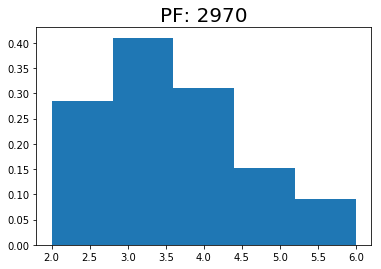

In [51]:
plt.hist(num_PF, normed = True, bins = 5)
plt.title('PF: '+str(len(name_PF)/7), size = 20)
plt.show()

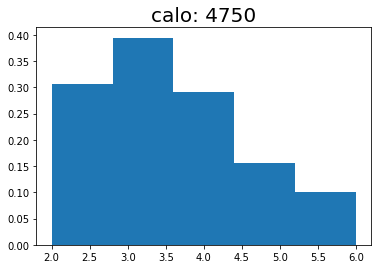

In [52]:
plt.hist(num_c, normed = True, bins = 5)
plt.title('calo: '+str(len(name_c)/7), size = 20)
plt.show()

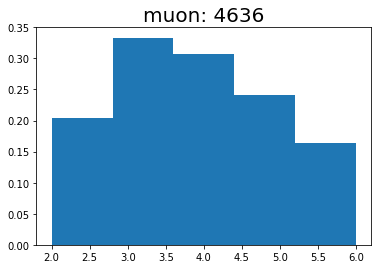

In [53]:
plt.hist(num_m, normed = True, bins = 5)
plt.title('muon: '+str(len(name_m)/7), size = 20)
plt.show()

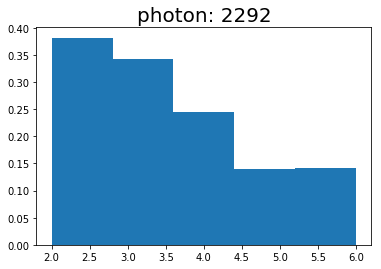

In [54]:
plt.hist(num_ph, normed = True, bins = 5)
plt.title('photon: '+str(len(name_ph)/7), size = 20)
plt.show()

## Merge

In [61]:
result_m = pd.read_pickle(file_name_m)
result_c = pd.read_pickle(file_name_c)
result_ph = pd.read_pickle(file_name_ph)
result_PF = pd.read_pickle(file_name_PF)

In [62]:
rs = [result_c, result_PF, result_ph, result_m]
ns = ["c", "PF", "ph", "m"]
for r1, n1 in zip(rs, ns):
    for  r2, n2 in zip(rs, ns):
         print n1, n2, pd.merge(r1, r2, how='inner', on=Ids_labels[:-1]+subsystemNames).shape[0]

c c 71094
c PF 71094
c ph 11422
c m 64235
PF c 71094
PF PF 71094
PF ph 11422
PF m 64235
ph c 11422
ph PF 11422
ph ph 68775
ph m 62766
m c 64235
m PF 64235
m ph 62766
m m 126111


In [63]:
a = pd.merge(result_c, result_PF, how='inner', on=Ids_labels[:-1]+subsystemNames)
b = pd.merge(result_ph, result_m, how='inner', on=Ids_labels[:-1]+subsystemNames)
result = pd.merge(a, b, how='inner', on=Ids_labels[:-1]+subsystemNames)

In [64]:
result.shape 

(10949, 769)

In [65]:
file_name_merged = '/home/fedor/notebook/ml4dc/ok_files/merged.pickle'
result.to_pickle(file_name_merged)
#result = pd.read_pickle(file_name_merged)

In [67]:
(len(Muon_features)+len(Cal_features)+len(PF_features)+len(Pho_features))*7+len(Ids_labels[:-1]+subsystemNames)

769

In [68]:
result = result.dropna(axis=0, how='any')

In [69]:
result.shape

(10872, 769)

In [70]:
np.mean(result["isSig"])

0.9754415011037527

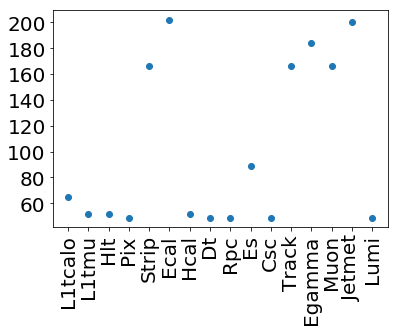

In [71]:
w = []
for s_name in subsystemNames:
    w.append((1.-np.mean(result[s_name]))*result.shape[0])

plt.scatter(np.arange(len(subsystemNames)), w)
plt.xticks(np.arange(len(subsystemNames)), subsystemNames, rotation=90, size = 20)
plt.yticks(size = 20)
plt.show()